Importing modules

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [3]:
!unzip Train_UQcUa52.zip


^C


In [4]:
df =pd.read_csv('train.csv')
df.head()


,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
image_path= 'Images/train/'

In [188]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(
    28, 28, 1), color_mode='grayscale')) for i in tqdm(range(df.shape[0]))]).astype('float32')


  0%|          | 0/49000 [00:00<?, ?it/s]

In [189]:
y=df['label']

In [190]:
print(X.shape,y.shape)

(49000, 28, 28, 1) (49000,)


4


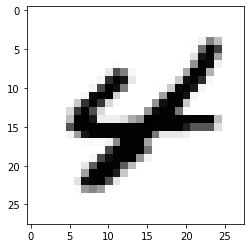

In [191]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28),cmap='Greys')

7


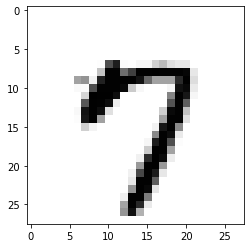

In [202]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28),cmap='Greys')

Train-Test split

In [201]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=np.array(y))

Normalization

In [203]:
x_train /=255
x_test /=255

input_shape = (28, 28, 1)
output_classes = 10

In [244]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from sklearn.model_selection import KFold


def sequential_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
              activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_classes, activation='softmax'))
    # model.add(Dropout(0.3))

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

Model Creation

In [248]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from sklearn.model_selection import KFold

cross_val=KFold(n_splits=5,shuffle=True,random_state=42)
fold_count=1

history_list=[]
eval_scores=[]



for train, validation in cross_val.split(X):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1
    model = sequential_model(input_shape)
    
    X_train, Y_train = X[train]/255, y[train]
    X_val, y_val = X[validation]/255, y[validation]
    
    history = model.fit(X_train, Y_train,
                        epochs=5,
                        validation_data=(X_val, y_val),
                        batch_size=64)
    
    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(X_val, y_val)
    
    history_list.append(history)
    eval_scores.append(eval_accuracy)

    print("_"*80)
    
    # fold += 1
    # model.fit(inputs[train],targets[test], epochs=5, batch_size=64,
    #           validation_data=(inputs[test], targets[train]))

    # scores = model.evaluate(inputs[test], targets[test], verbose=0)
    # print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    # acc_per_fold.append(scores[1] * 100)
    # loss_per_fold.append(scores[0])

#     pred = model.predict(x_test)

#     oos_y.append(y_test)
#     pred=pred
#     oos_pred.append(pred)

#     y_compare=y_test
#     score = metrics.accuracy_score(y_compare, pred) 
#     print("Fold score (accuracy): {}".format(score))
# # model.summary()

# oos_y = np.concatenate(oos_y)
# oos_pred = np.concatenate(oos_pred)
# oos_y_compare=oos_y

# score=metrics.accuracy_score(oos_y_compare, oos_pred)
# print("Final score (accuracy): {}".format(score))


Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/5
613/613 [==============================] - 18s 28ms/step - loss: 0.2204 - accuracy: 0.9332 - val_loss: 0.0759 - val_accuracy: 0.9752
Epoch 2/5
613/613 [==============================] - 19s 32ms/step - loss: 0.0603 - accuracy: 0.9809 - val_loss: 0.0581 - val_accuracy: 0.9811
Epoch 3/5
612/613 [============================>.] - ETA: 0s - loss: 0.0427 - accuracy: 0.9866

Training the model

In [173]:

# model.fit(x=x_train,y=y_train, epochs=5,batch_size=64,validation_data=(x_test, y_test))

Epoch 1/5
575/575 [==============================] - 13s 23ms/step - loss: 0.2497 - accuracy: 0.9227 - val_loss: 0.1788 - val_accuracy: 0.9379
Epoch 2/5
575/575 [==============================] - 12s 21ms/step - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.0521 - val_accuracy: 0.9847
Epoch 3/5
575/575 [==============================] - 12s 22ms/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 0.0497 - val_accuracy: 0.9843
Epoch 4/5
575/575 [==============================] - 12s 21ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0521 - val_accuracy: 0.9851
Epoch 5/5
575/575 [==============================] - 12s 21ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0445 - val_accuracy: 0.9887


In [227]:
# import matplotlib.pyplot as plt

# accuracy=history_list.history['accuracy']
# loss=history_list.history['loss']

# epochs=range(len(accuracy))

# plt.plot(epochs,accuracy,'r')
# plt.plot(epochs,loss,'b')
# plt.show()

AttributeError: 'list' object has no attribute 'history'

Testing


Predicted output: 2


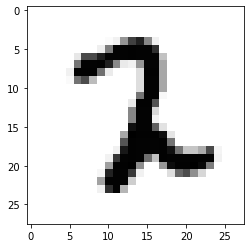

In [231]:
image_index=50
# print("Original output:",y_test[image_index])
plt.imshow(X_train[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_train[image_index].reshape(1, 28, 28, 1))
print("Predicted output:",pred.argmax())

ACCURACY

In [247]:
score=model.evaluate(X_val,y_val)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
average=sum(eval_scores)/len(eval_scores)
print("Average accuracy",average)
# index=eval_scores.index(max(eval_scores))
print("best accuracy",max(eval_scores))

307/307 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9890
Test loss: 0.034799449145793915
Test accuracy: 0.9889795780181885
Average accuracy 0.9875510215759278
best accuracy 0.9889795780181885


Predicted output: 1


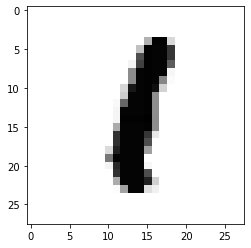

In [123]:
image_index=0
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output:",pred.argmax())

In [ ]:
model.save('model.h5')
print("Saved model to disk")

Saved model to disk
